In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='/content/drive/MyDrive/height-weight.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

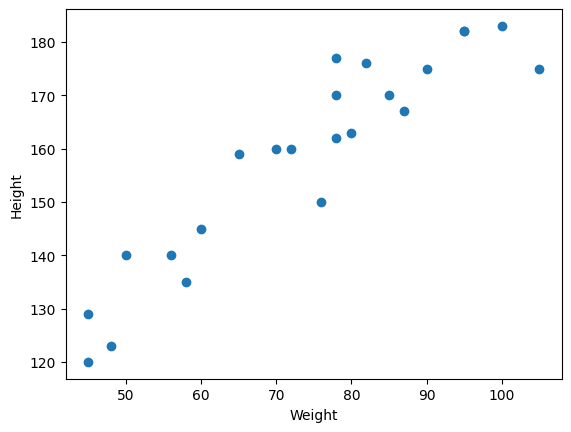

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
## divide the dataset into independent and dependent features

In [ ]:
x=df[['Weight']] ## independent features
y=df['Height']  ## dependent features

In [ ]:

x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:


y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [ ]:
## train test split
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x.shape

(23, 1)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [ ]:
## standardize the dataset train independent data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


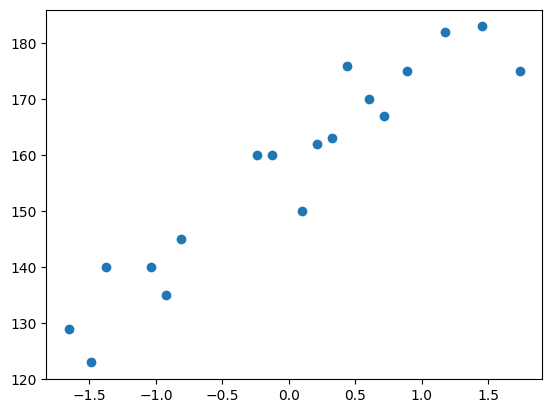

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
## train the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('the slope or cofficient of weight is',regressor.coef_)
print('intercept',regressor.intercept_)

the slope or cofficient of weight is [17.03440872]
intercept 157.5


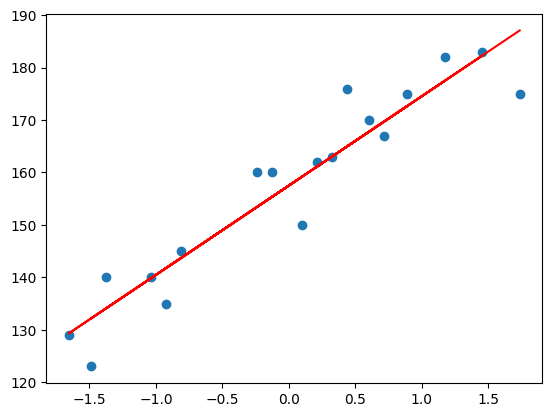

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

prediction of train data


predicted height output= intercept +coef_(Weights)


y_pred_train =157.5 + 17.03(X_train)


prediction of test data


predicted height output= intercept +coef_(Weights)


y_pred_test =157.5 + 17.03(X_test)

In [ ]:
y_pred_test=regressor.predict(x_test)

In [ ]:
y_pred_test,y_test

(array([1486.18388009, 1486.18388009,  924.04839236, 1775.76882831,
        1264.73656674]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

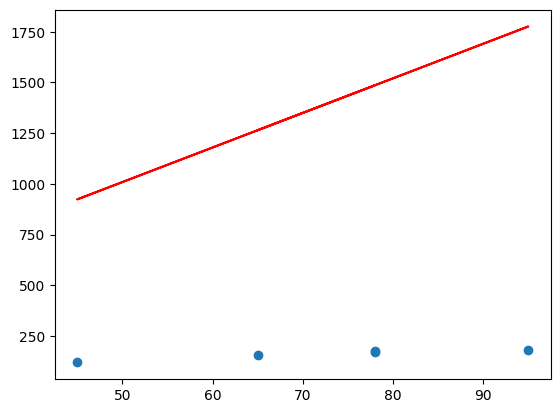

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

In [ ]:
## Performance Metrics
## MSE,MAE,RMSE
## R square and adjusted R square

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1571109.7376966465
1225.7843095186977
1253.4391639392184


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [ ]:
score

-3190.755521080462

In [ ]:
## R square
## Formula

## R^2 = 1 - SSR/SST

## R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-4254.6740281072825

In [ ]:
regressor

LinearRegression()

In [ ]:
## new data points  weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

array([[80.]])

In [ ]:
regressor.predict([scaled_weight[0]])

array([1520.25269753])